In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
salaries_df = pd.read_csv("salaries.csv", low_memory=False)
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [3]:
# Reduce this dataframe to just salaries

columns = ["salary"]
Bonus2_df = salaries_df.loc[:, columns]
Bonus2_df.tail()

,salary
300019,40000
300020,58058
300021,49597
300022,40000
300023,63707


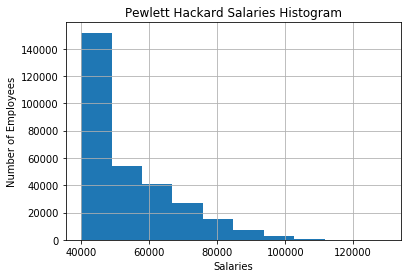

In [4]:
# Bonus Q2. Create a histogram to visualize the most common salary ranges for employees.

Bonus2_df.hist('salary', histtype='bar')
plt.title("Pewlett Hackard Salaries Histogram")
plt.xlabel("Salaries")
plt.ylabel("Number of Employees")

# Save plot as png file
plt.savefig("Salaries_Histogram.png")
plt.show()

SJ Analysis: The histogram above shows that about 150,000 or half of the employee salaries are in the lowest salary bin ($40,000 to $50,000) and 90% of the company's employee salaries were under $90,000.

In [5]:
titles_df = pd.read_csv("titles.csv", low_memory=False)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [6]:
# Merge the two dataframes to get titles and salaries data in the same dataframe

Bonus3_df = pd.merge(titles_df, salaries_df, how='left', left_on=[titles_df.emp_no, titles_df.from_date], right_on = [salaries_df.emp_no, salaries_df.from_date])

# Reduce this dataframe to just titles and salaries

columns = ["title", "salary"]
Bonus3_df = Bonus3_df.loc[:, columns]
Bonus3_df.tail()

,title,salary
443303,Engineer,49597.0
443304,Senior Engineer,NaN
443305,Senior Staff,NaN
443306,Staff,40000.0
443307,Engineer,63707.0


In [7]:
# Remove NaN rows and re-index

Bonus3_df = Bonus3_df.dropna(subset = ["salary"], how='any')
Bonus3_df = Bonus3_df.reset_index(drop=True)
Bonus3_df.tail()

,title,salary
300019,Engineer,40000.0
300020,Engineer,58058.0
300021,Engineer,49597.0
300022,Staff,40000.0
300023,Engineer,63707.0


In [8]:
# Group by the title and average salary to form the basis of the plot

Bonus3_plot_df = Bonus3_df.groupby(["title"]).mean()
Bonus3_plot_df

,salary
title,
Assistant Engineer,48493.204786
Engineer,48547.807738
Manager,57290.777778
Senior Engineer,48425.342063
Senior Staff,58547.693682
Staff,58465.500955
Technique Leader,48580.975053


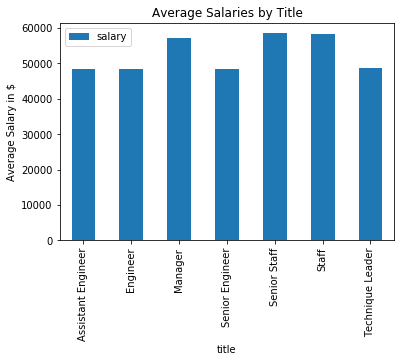

In [9]:
# Bonus Q3. Create a bar chart of average salary by title.

Bonus3_plot_df.plot(kind='bar', alpha=1)
plt.title("Average Salaries by Title")
plt.ylabel("Average Salary in $")

# Save plot as png file
plt.savefig("Salaries_by_Title.png")
plt.show()

SJ Analysis:  The bar chart above shows that the average salaries for Assistant Engineers, Engineers, Senior Engineers, and Technique Leaders is all roughly the same (~$50K).  Unless Pewlett Hackard is a particularly poorly run company, this doesn't make any sense, and leads me to question the credibility of the dataset. One would expect the salaries to be as follows -  Assistant Engineers < Engineers < Senior Engineers < Technique Leaders. 

In [10]:
# Epilogue: "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

salaries_df.loc[salaries_df['emp_no'] == 499942, :]
titles_df.loc[titles_df['emp_no'] == 499942, :]

,emp_no,title,from_date,to_date
443224,499942,Technique Leader,1998-03-28,9999-01-01


In [11]:
employees_df = pd.read_csv("employees.csv", low_memory=False)
employees_df.loc[employees_df['emp_no'] == 499942, :]

,emp_no,birth_date,first_name,last_name,gender,hire_date
299966,499942,1963-01-10,April,Foolsday,F,1997-02-10


SJ Analysis: Haha! 